In [1]:
import pandas as pd
import numpy as np

In [2]:
FILE = 'travistorrent_11_1_2017.csv'
#size = 500000
size = 3000000

In [3]:
#for dataset in pd.read_csv(file, engine='c', chunksize=size):
#    process(dataset)

In [6]:
dataset = pd.read_csv(FILE, sep=',', engine='c',usecols=['gh_team_size','tr_build_id','gh_project_name'],dtype={'gh_team_size': np.int32,
                                                                                                                'tr_build_id': np.float32,
                                                                                                                'gh_project_name': 'category'}
                                                                                                                              , nrows = size, encoding='utf-8')


In [8]:
dataset.gh_team_size.head(1)

0    240
Name: gh_team_size, dtype: int32

In [4]:
%%time
dataset = pd.read_csv(FILE, sep=',', engine='c',dtype={'gh_team_size': np.int32,
                                                        'git_num_all_built_commits': np.int32,
                                                        'gh_num_commit_comments': np.int32,
                                                        'git_diff_src_churn': np.int32,
                                                        'git_diff_test_churn': np.int32,
                                                        'gh_diff_files_added': np.int32,
                                                        'gh_diff_files_deleted': np.int32,
                                                        'gh_diff_files_modified': np.int32,
                                                        'gh_diff_tests_added': np.int32,
                                                        'gh_diff_tests_deleted': np.int32,
                                                        'gh_diff_src_files': np.int32,
                                                        'gh_diff_doc_files': np.int32,
                                                        'gh_diff_other_files': np.int32,
                                                        'gh_num_commits_on_files_touched': np.int32,
                                                        'gh_sloc': np.int32,
                                                        'tr_build_number': np.int32,
                                                        'tr_job_id': np.int32,
                                                        'tr_build_id': np.float32,
                                                        'gh_pull_req_num': np.float32,
                                                        'gh_num_commits_in_push': np.float32,
                                                        'tr_prev_build': np.float32,
                                                        'gh_num_issue_comments': np.float32,
                                                        'gh_num_pr_comments': np.float32,
                                                        'gh_test_lines_per_kloc': np.float32,
                                                        'gh_test_cases_per_kloc': np.float32,
                                                        'gh_asserts_cases_per_kloc': np.float32,
                                                        'gh_description_complexity': np.float32,
                                                        'tr_duration': np.float32,
                                                        'tr_log_setup_time': np.float32,
                                                        'tr_log_num_tests_ok': np.float32,
                                                        'tr_log_num_tests_failed': np.float32,
                                                        'tr_log_num_tests_run': np.float32,
                                                        'tr_log_num_tests_skipped': np.float32,
                                                        'tr_log_testduration': np.float32,
                                                        'tr_log_buildduration': np.float32,

                                                        'gh_project_name': 'category',
                                                        'gh_pr_created_at': 'category',
                                                        'gh_lang': 'category',
                                                        'git_merged_with': 'category',
                                                        'git_branch': 'category',
                                                        'gh_commits_in_push': 'category',
                                                        'git_prev_commit_resolution_status': 'category',
                                                        'git_prev_built_commit': 'category',
                                                        'gh_first_commit_created_at': 'category',
                                                        'git_all_built_commits': 'category',
                                                        'git_trigger_commit': 'category',
                                                        'tr_virtual_merged_into': 'category',
                                                        'tr_original_commit': 'category',
                                                        'gh_pushed_at': 'category',
                                                        'gh_build_started_at': 'category',
                                                        'tr_status': 'category',
                                                        'tr_jobs': 'category',
                                                        'tr_log_lan': 'category',
                                                        'tr_log_status': 'category',
                                                        'tr_log_analyzer': 'category',
                                                        'tr_log_frameworks': 'category',
                                                        'tr_log_bool_tests_failed': 'category',
                                                        'tr_log_tests_failed': 'category',


                                                        'gh_is_pr': np.bool,
                                                        'gh_by_core_team_member': np.bool,
                                                        'tr_log_bool_tests_ran': np.bool}

                                                                                          , nrows = size, encoding='utf-8')

'''
Signature:
    sep - separa por virgula
    nrows - limite de linhas lidas
    encoding - tipo de caracter
    engine - Mecanismo do analisador
    na_values - procura os padrões na|nan como str
    keep_default_na - define como nan os padroes econtrados em na_values
    
'''



CPU times: user 57.7 s, sys: 1.94 s, total: 59.7 s
Wall time: 59.5 s


In [5]:
# props, NAlist = reduce_mem_usage(pd.read_csv(FILE))

<font size=4/>
   * Elimia as colunas não utilizadas

In [6]:
# Eliminando colunas - 
dataset.drop([  'gh_diff_files_added',
                'gh_commits_in_push',
                'gh_diff_files_deleted',
                'gh_diff_files_modified',
                'gh_diff_tests_added',
                'gh_diff_tests_deleted',
                'gh_diff_src_files',
                'gh_diff_doc_files',
                'gh_diff_other_files',
                'gh_sloc',
                'gh_test_lines_per_kloc',
                'gh_test_cases_per_kloc',
                'gh_pull_req_num',
                'gh_description_complexity',
                'git_merged_with',
                'gh_asserts_cases_per_kloc',
              
                'git_prev_built_commit',
              
                'tr_log_status',
                'tr_status',
                'tr_job_id',
                'tr_jobs',
                'tr_build_number',
                'tr_duration',
                'tr_log_lan',
                'tr_log_num_tests_run',
                'tr_log_setup_time',
                'tr_log_analyzer',
                'tr_log_frameworks',
                'tr_log_bool_tests_ran',
                'tr_log_bool_tests_failed',
                'tr_log_tests_failed',
                'tr_log_testduration',
                'tr_log_buildduration'], axis=1, inplace=True)

In [8]:

df_ruby = dataset.dropna() # Remove as linhas NAN

df_ruby['date'], df_ruby['hours'] = df_ruby.gh_pushed_at.str.split(' ').str # Separa a coluna que possui data e hora em duas novas colunas de data hora
    

/home/wagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<font size=4/> 
   * Testing

In [7]:
projects = dataset.drop_duplicates(['gh_project_name'])
projects = projects.loc[projects['gh_lang']=='ruby']
projects = projects.gh_project_name


* Taxa de commit por participante no projeto- Quantidade total de commits / Quantidade total de participantes

In [65]:
def rate_commit(projects):
    list_project_name = []
    list_rate_commit = []
    
    for project_name in projects:
        # Define projeto
        df_ruby = dataset.loc[dataset['gh_project_name'] == project_name] # Filtro penas o projeto
        #df_ruby = df_ruby.dropna() # Remove as linhas NaN
        
        # Remove linhas duplicadas
        df_ruby = df_ruby.drop_duplicates(['tr_build_id']) # remove as linhas duplicadas
        start_build = df_ruby['tr_build_id'] # cria uma serie com os ids das builds unicas do projeto
        
        
        # Soma de todos push
        num_commit = df_ruby.gh_num_commits_in_push.sum() 
        
        # Quantidade de contribuidores do projeto
        team_size = int(df_ruby.gh_team_size.head(1))
         

        if((num_commit != 0) and (team_size != 0)):
            # Media projeto
            mean_project = len(start_build)/team_size
            
            # Taxa commit
            taxa_commit = (num_commit/ mean_project)
            
            list_rate_commit.append(taxa_commit)
            list_project_name.append(project_name)
    return(list_rate_commit, list_project_name)

In [83]:
def project_frequency(list_rate_commit, list_project_name):
    low_frequency = []
    medium_frequency = []
    high_frequency = []
    
    for i in range(len(list_rate_commit)):
        if(list_rate_commit[i] < 8):
            low_frequency.append(list_project_name[i])
            
        elif((list_rate_commit[i] > 8) and (list_rate_commit[i] < 25)) :
            medium_frequency.append(list_project_name[i])
            
        else:
            high_frequency.append(list_project_name[i])
            
            
    return(low_frequency, medium_frequency, high_frequency)

In [84]:
list_rate_commit, list_project_name = rate_commit(projects)

In [85]:
low, medium, high = project_frequency(list_rate_commit, list_project_name)

In [86]:
print(len(low))
low

418


['intridea/omniauth',
 'sferik/sign-in-with-twitter',
 'codeforamerica/follow-all',
 'codeforamerica/adopt-a-hydrant',
 'saberma/shopqi',
 'activerecord-hackery/squeel',
 'dkubb/veritas',
 'drapergem/draper',
 'weppos/whois',
 'thoughtbot/kumade',
 'mongoid-rspec/mongoid-rspec',
 'sferik/multi_xml',
 'huerlisi/bookyt',
 'mperham/dalli',
 'innoq/iqvoc',
 'ledermann/unread',
 'cheezy/page-object',
 'datamapper/do',
 'nov/fb_graph',
 'tscolari/mobylette',
 'sstephenson/execjs',
 'mperham/girl_friday',
 'judofyr/temple',
 'benjaminoakes/maid',
 'davetron5000/gli',
 'jarib/childprocess',
 'test-unit/test-unit',
 'phoet/asin',
 'ging/social_stream',
 'intridea/oauth2',
 'holman/boom',
 'pengwynn/faraday_middleware',
 'ryanb/letter_opener',
 'premailer/premailer',
 'thoughtbot/paul_revere',
 'svenfuchs/gem-release',
 'bensie/sshkey',
 'htty/htty',
 'davetron5000/methadone',
 'RolifyCommunity/rolify',
 'elcuervo/airplay',
 'nov/json-jwt',
 'drbrain/net-http-persistent',
 'langalex/couch_potato

In [87]:
print(len(medium))
medium

334


['benhoskings/babushka',
 'rubychan/coderay',
 'radiant/radiant',
 'engineyard/engineyard',
 'tdiary/tdiary-core',
 'guard/guard-rspec',
 'ruby-amqp/amqp',
 'sstephenson/sprockets',
 'thoughtbot/factory_girl',
 'matschaffer/knife-solo',
 'Locale/localeapp',
 'hotsh/rstat.us',
 'guard/guard',
 'mislav/will_paginate',
 'beerlington/classy_enum',
 'arsduo/koala',
 'justinfrench/formtastic',
 'guard/guard-livereload',
 'assaf/vanity',
 'nesquena/rabl',
 'activerecord-hackery/ransack',
 'ctran/annotate_models',
 'mailboxer/mailboxer',
 'jimweirich/rake',
 'thoughtbot/high_voltage',
 'neo4jrb/neo4j',
 'codebrew/backbone-rails',
 'afeld/magickly',
 'hacketyhack/hackety-hack.com',
 'Casecommons/pg_search',
 'lwe/simple_enum',
 'colszowka/simplecov',
 'thoughtbot/flutie',
 'eventmachine/eventmachine',
 'activeadmin/activeadmin',
 'collectiveidea/awesome_nested_set',
 'ari/jobsworth',
 'wvanbergen/chunky_png',
 'rtomayko/tilt',
 'rdoc/rdoc',
 'mbulat/plutus',
 'brianmario/mysql2',
 'jruby/warble

In [88]:
print(len(high))
high

120


['rails/rails',
 'concerto/concerto',
 'rubinius/rubinius',
 'rspec/rspec-core',
 'plataformatec/devise',
 'rspec/rspec-rails',
 'sferik/rails_admin',
 'errbit/errbit',
 'padrino/padrino-framework',
 'thoughtbot/paperclip',
 'plataformatec/simple_form',
 'rspec/rspec-mocks',
 'diaspora/diaspora',
 'Shopify/liquid',
 'thoughtbot/shoulda-matchers',
 'rubygems/rubygems',
 'spree/spree',
 'pry/pry',
 'jruby/activerecord-jdbc-adapter',
 'RubyMoney/money',
 'mbleigh/acts-as-taggable-on',
 'rspec/rspec-expectations',
 'heroku/heroku',
 'thoughtbot/suspenders',
 'jnicklas/capybara',
 'travis-ci/travis-core',
 'presidentbeef/brakeman',
 'radar/forem',
 'puppetlabs/puppet',
 'thoughtbot/clearance',
 'mperham/sidekiq',
 'mitchellh/vagrant',
 'twilio/twilio-ruby',
 'celluloid/celluloid',
 'redis/redis-rb',
 'jruby/jruby',
 'rails/activeresource',
 'svenfuchs/rails-i18n',
 'pophealth/popHealth',
 'haml/haml',
 'shoes/shoes4',
 'troessner/reek',
 'recurly/recurly-client-ruby',
 'puppetlabs/puppetlab

In [89]:
sorted(list_rate_commit)

[0.055776892430278883,
 0.1956521739130435,
 0.28346456692913385,
 0.416,
 0.46875,
 0.5365853658536586,
 0.6111111111111112,
 0.6328125,
 0.7109929078014184,
 0.7668711656441718,
 0.9265175718849841,
 0.9383458646616541,
 0.9523809523809523,
 0.9770114942528736,
 0.9832402234636871,
 0.9857142857142858,
 1.0344827586206897,
 1.2755555555555556,
 1.2815315315315314,
 1.3421052631578947,
 1.3566433566433567,
 1.3872832369942196,
 1.3895348837209303,
 1.3977272727272727,
 1.5018050541516246,
 1.5220588235294117,
 1.5474452554744527,
 1.5873015873015872,
 1.5913978494623655,
 1.6067415730337078,
 1.6214285714285714,
 1.6328195829555756,
 1.641509433962264,
 1.7244094488188975,
 1.7846153846153847,
 1.8047337278106508,
 1.8125,
 1.813753581661891,
 1.8355555555555556,
 1.9487179487179487,
 1.9711538461538463,
 1.9770408163265305,
 2.005291005291005,
 2.0185185185185186,
 2.02135231316726,
 2.033333333333333,
 2.0352422907488985,
 2.053061224489796,
 2.0955223880597016,
 2.1044776119402986,

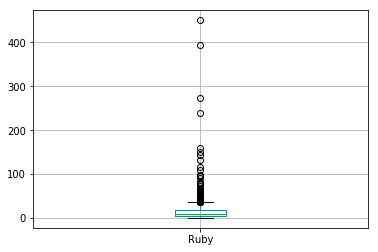

In [70]:
df = pd.DataFrame(list_rate_commit, columns=['Ruby'])

df.boxplot(column=['Ruby'])

In [74]:
list_rate_commit

[393.8696951583981,
 4.653679653679653,
 27.68947152806227,
 2.246192893401015,
 8.365384615384615,
 96.79072063178677,
 2.2131386861313866,
 8.432098765432098,
 3.6185567010309274,
 10.54368932038835,
 1.8047337278106508,
 62.96905660377359,
 12.475247524752476,
 35.19282511210762,
 34.68290598290598,
 59.67076923076923,
 22.877551020408163,
 1.3872832369942196,
 17.141618497109828,
 1.5474452554744527,
 13.764192139737991,
 14.70183486238532,
 7.942760942760942,
 9.195652173913043,
 4.850370370370371,
 0.28346456692913385,
 2.6106870229007635,
 25.765209125475288,
 42.552291421856644,
 10.426136363636363,
 54.46987951807229,
 2.5569620253164556,
 12.25,
 52.639405204460964,
 6.364615384615385,
 23.88235294117647,
 7.214723926380368,
 22.944444444444446,
 6.254922279792746,
 15.692307692307692,
 4.803571428571429,
 8.222222222222221,
 10.186968838526912,
 5.682051282051282,
 24.655594405594407,
 6.481012658227848,
 0.9265175718849841,
 8.46456692913386,
 2.033333333333333,
 14.1136363

<font size=4/> 
   * Remove linhas duplicadas

In [25]:
#single_push = df_ruby.drop_duplicates(['tr_build_id']) # remove as linhas duplicadas

#single_push = single_push['tr_build_id'] # cria uma serie com os push unicos do projeto

start_build = df.ruby.tr_build_id

<font size=4/> 
   * Soma de todos push

In [26]:
num_commit = df_ruby.gh_num_commits_in_push.sum() 

<font size=4/> 
   * Duração do projeto

In [27]:
first_data, hora = df_ruby.gh_first_commit_created_at.head(1).str.split(' ').str
first_data = int(first_data.str.replace('-', ''))

In [28]:
last_data,  hora = df_ruby.gh_first_commit_created_at.tail(1).str.split(' ').str
last_data = int(last_data.str.replace('-',''))

In [33]:
date_commit = last_data - first_data

<font size=4/> 
   * Media participante

In [34]:
mean_participante = df_ruby.gh_team_size.sum()/ len(start_build)

<font size=4/> 
   * Taxa de commit

In [35]:
taxa_commit = num_commit/(date_commit * mean_participante)
taxa_commit

0.014350276795791908

In [37]:
df_ruby.head(5)

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,git_prev_commit_resolution_status,...,gh_pushed_at,gh_build_started_at,tr_status,tr_job_id,tr_log_status,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_skipped,data,hora
638680,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-02-17 01:06:32,2013-06-15 12:47:57,passed,8113939,ok,14749.0,0.0,2.0,2013-02-17,01:06:32
638681,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-02-17 01:06:32,2013-06-15 12:47:57,passed,8113941,ok,7260.0,0.0,44.0,2013-02-17,01:06:32
638682,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-02-17 01:06:32,2013-06-15 12:47:57,passed,8113943,ok,7630.0,0.0,77.0,2013-02-17,01:06:32
638683,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-06-15 12:45:17,2013-06-15 12:47:57,passed,8113944,ok,879.0,0.0,0.0,2013-06-15,12:45:17
638684,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-06-15 12:45:17,2013-06-15 12:47:57,passed,8113949,ok,7464.0,0.0,96.0,2013-06-15,12:45:17
